Applying backpropagation & gradient descent to linear regression
----------------------------------------------------------------

Feb, 2020

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# define our function and our goal values
def fn(x,m,b):
    return m*x + b

# trying to guess these M & B values
M0 = -0.737
B0 = 0.925

# arrays of 20 "goal" values
X0 = 2*np.random.rand(20)-1
Y0 = fn(X0,M0,B0)

# define our cost function as Mean Square Error
# and leverage this URL's derivation of the derivative aka gradient
# https://medium.com/@Aj.Cheng/linear-regression-by-gradient-decent-bb198724eb2c
def MSE(y_hat,y):
    n = y_hat.shape[0]
    sqe = (y_hat - y) * (y_hat - y)
    return sqe.sum()/n

def dMSE_dm(x,y,m,b):
    n = x.shape[0]
    v = -x * (y - (m*x + b))
    v = v.sum()
    return 2*v/n

def dMSE_db(x,y,m,b):
    n = x.shape[0]
    v = -(y - (m*x + b))
    v = v.sum()
    return 2*v/n

In [3]:
# here we do the gradient descent starting with an initial m,b guess
# and adjusting it slowly to improve the error
def run(X,Y,num_iterations,learning_rate):
    m = 2*np.random.rand()-1
    b = 2*np.random.rand()-1
    m_history = np.zeros(num_iterations+1)
    b_history = np.zeros(num_iterations+1)
    m_history[0] = m
    b_history[0] = b
    for i in range(num_iterations):
        Y_hat = fn(X,m,b)
        mse = MSE(Y_hat,Y)
        if i % (num_iterations//10) == 0:
            print(f"{i}: cost = {mse}")
        m_gradient = dMSE_dm(X,Y,m,b)
        b_gradient = dMSE_db(X,Y,m,b)
        #print(f"{mse} {m_gradient} {b_gradient}")
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
        m_history[i+1] = m
        b_history[i+1] = b
    return m_history,b_history

In [4]:
N = 50  # number of gradient descent steps
LR = 0.05 # learning rate
print(f"trying to get M={M0} B={B0}")
ms,bs = run(X0,Y0,N,LR)
print(f"final guess M={ms[-1]} B={bs[-1]}")

trying to get M=-0.737 B=0.925
0: cost = 2.135914552192034
5: cost = 0.9006572604410413
10: cost = 0.44427512453674556
15: cost = 0.25894610170631266
20: cost = 0.17191746015812948
25: cost = 0.12350847285894832
30: cost = 0.09240292147438864
35: cost = 0.07046129302132371
40: cost = 0.054192382690786675
45: cost = 0.0418376520354363
final guess M=-0.38581761115356455 B=0.993324894885626


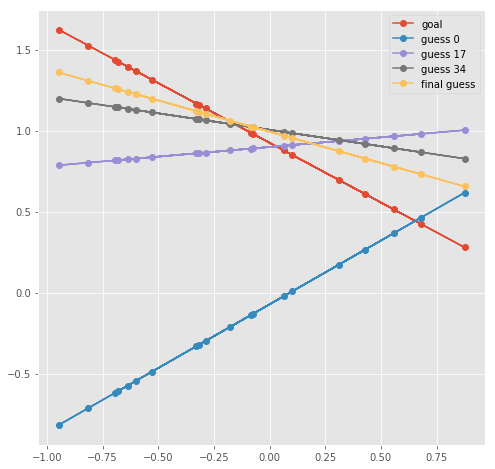

In [5]:
# let's look at how we did
plt.figure(figsize=(8,8))
plt.plot(X0,Y0,marker='o',label="goal")
for i in range(0,N+1,(N+1)//3):
    plt.plot(X0,fn(X0,ms[i],bs[i]),marker='o',label=f"guess {i}")
plt.plot(X0,fn(X0,ms[-1],bs[-1]),marker='o',label="final guess")
plt.legend()